<h1>Мини-проект </h1>

1. Для начала посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. Тонкий момент: помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. Округлите ответы до целых чисел.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
ads_clients_data = pd.read_csv("/home/jupyter-r-ivanov-20/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv")
ads_data = pd.read_csv("/home/jupyter-r-ivanov-20/shared/homeworks/python_ds_miniprojects/6/ads_data.csv")

In [3]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [4]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [5]:
events_df = ads_data.groupby(["ad_id", "event"], as_index = False) \
                    .agg({"time" : "count"}) \
                    .pivot(index = "ad_id", columns = "event", values = "time") \
                    .reset_index() \
                    .fillna(0)

In [6]:
events_df.view.mean()

923.1316062176165

In [7]:
events_df.click.mean()

113.1378238341969

2. Давайте посмотрим на распределение показов объявлений!


* По оси x – число показов
* По оси y – доля объявлений с такими показами    


Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения.

Необходимо использовать следующие настройки:

```Python
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
```

In [8]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [9]:
np.log(events_df.view.sort_values()).apply(lambda x : -1 if x == float("-inf") else x)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


439    -1.000000
119    -1.000000
880    -1.000000
564    -1.000000
847    -1.000000
         ...    
552     9.886748
228    10.092122
739    10.858922
733    12.125925
787    12.770824
Name: view, Length: 965, dtype: float64

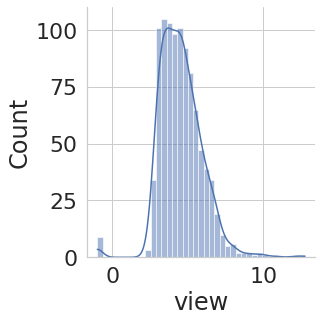

In [10]:
ax = sns.displot(np.log(events_df.view.sort_values()).apply(lambda x : -1 if x == float("-inf") else x), kde = True)

3. Теперь нужно найти среднее количество показов на 1 объявление (<b>ad_id</b>) по дням, не учитывая объявления, у которых не было показов (обычное среднее). После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.  

<b>Вопрос:</b> Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [11]:
views_df = ads_data.query("event == 'view'") \
                   .groupby(["ad_id", "date"], as_index = False) \
                   .agg({"time" : "count"})

In [12]:
mean_values = views_df.groupby("date", as_index = False) \
                      .agg({"time" : "mean"})

In [13]:
mean_values["roll"] = mean_values.time.rolling(2).mean()

In [14]:
mean_values

,date,time,roll
0,2019-04-01,154.482270,NaN
1,2019-04-02,137.786982,146.134626
2,2019-04-03,163.952778,150.869880
3,2019-04-04,675.901720,419.927249
4,2019-04-05,919.109677,797.505699
5,2019-04-06,277.122727,598.116202


5. Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем.

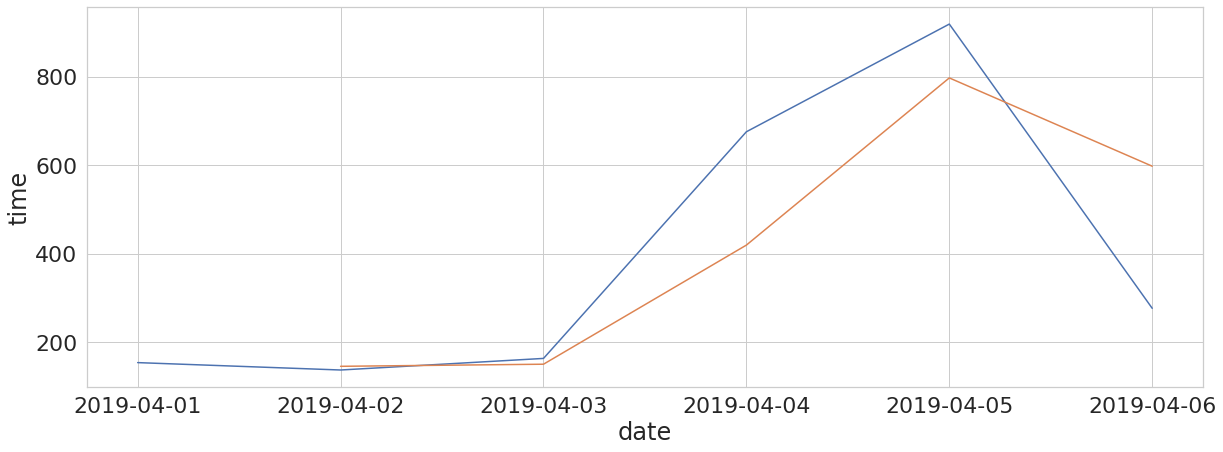

In [15]:
ax = sns.lineplot(data = mean_values, x = mean_values.date, y = mean_values.time)
ax = sns.lineplot(data = mean_values, x = mean_values.date, y = mean_values.roll)

In [16]:
np.abs(mean_values.time - mean_values.roll)

0           NaN
1      8.347644
2     13.082898
3    255.974471
4    121.603979
5    320.993475
dtype: float64

6. Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента (<b>create_date</b>) и первым запуском рекламного объявления этим клиентом (<b>date</b>).

В качестве ответа укажите среднее число дней.

In [17]:
total_data = ads_clients_data.merge(ads_data, on = "client_union_id")

In [18]:
total_data["date_x"] = pd.to_datetime(total_data.date_x)

In [19]:
total_data["date_y"] = pd.to_datetime(total_data.date_y)

In [20]:
total_data["create_date"] = pd.to_datetime(total_data.create_date)

In [21]:
total_data.head()

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035


In [22]:
total_data["delta_time"] = total_data.date_y - total_data.create_date

In [23]:
total_data["delta_time"] = total_data.delta_time.dt.days

In [24]:
total_data.head()

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,delta_time
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035,98
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035,98
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035,98


In [25]:
total_data.groupby("client_union_id", as_index = False) \
          .agg({"delta_time" : "min"}).mean()

client_union_id    47921.434368
delta_time           124.378282
dtype: float64

7. Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. Например, 1000 клиентов создали кабинет, но лишь 50 из них запустили рекламу. В таком случае конверсия будет равна

$ \frac{50}{100} * 100 = 5\% $

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с <b>pd.Timedelta(365, unit='day'))</b>.

In [55]:
# Нужыные клиенты (отфильтровали значения NaN)
right_clients = total_data.groupby("client_union_id", as_index = False) \
                          .agg({"delta_time" : "min"}).shape[0]

In [56]:
# Число всех клиентов:
all_clients = ads_clients_data.client_union_id.nunique()

In [61]:
round(right_clients/all_clients * 100, 2)

0.69

8. Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков дней для метода <b>pd.cut()</b> – <b>[0, 30, 90, 180, 365]</b>. Создать временные промежутки можно с помощью <b>pd.to_timedelta()</b>.

In [64]:
total_data["delta_time"] = pd.to_timedelta(total_data.delta_time, unit = "days")

In [67]:
total_data["delta_time_categorical"] =  \
pd.cut(total_data.delta_time, bins = pd.to_timedelta(["0 days",
                                                      "30 days",
                                                      "90 days",
                                                      "180 days",
                                                      "365 days"]),
                                        labels = ["0-30",
                                                  "30-90",
                                                  "90-180",
                                                  "180-365"])

In [69]:
total_data.head()

,date_x,client_union_id,community_id,create_date,date_y,time,event,platform,ad_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,delta_time,delta_time_categorical
0,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:08:51,view,android,3,1,CPC,46.7,0,45035,98 days,90-180
1,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:09:36,view,ios,3,1,CPC,46.7,0,45035,98 days,90-180
2,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:30,view,ios,3,1,CPC,46.7,0,45035,98 days,90-180
3,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:29:58,view,android,3,1,CPC,46.7,0,45035,98 days,90-180
4,2020-05-07,1,-130371893,2018-12-24,2019-04-01,2019-04-01 00:51:54,view,android,3,1,CPC,46.7,0,45035,98 days,90-180


In [72]:
total_data.query("delta_time_categorical == '0-30'").client_union_id.nunique()

11

9. И последнее задание: постройте интерактивный барплот, на котором будут показаны категории с количеством уникальных клиентов в них (то, что у вас получилось на прошлом степе, по запуску первого рекламного объявления).

In [79]:
categories = \
total_data.groupby("delta_time_categorical", as_index = False) \
          .agg({"client_union_id" : pd.Series.nunique})

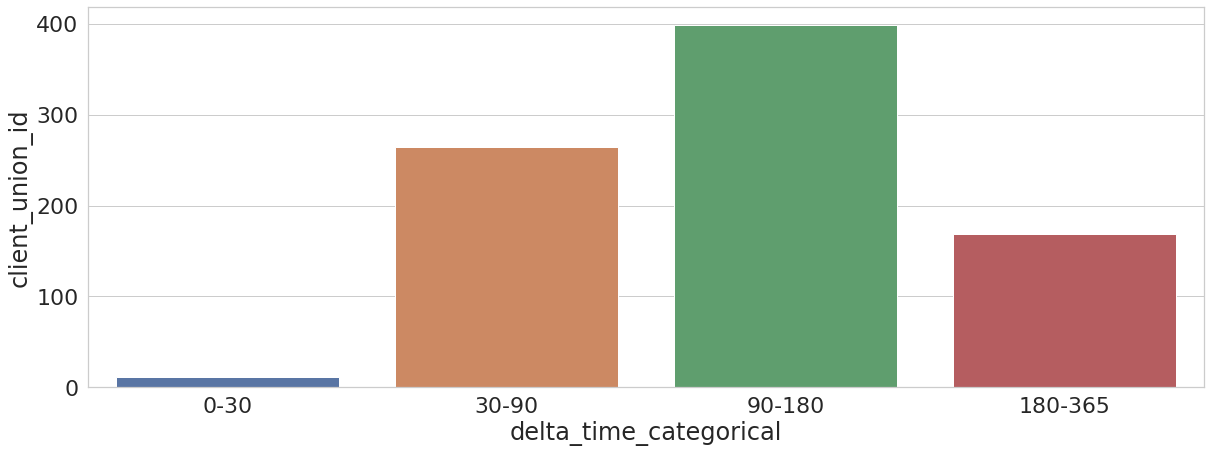

In [80]:
ax = sns.barplot(data = categories, x = "delta_time_categorical", y = "client_union_id")